In [1]:
# Essentials
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the data
# !ls ../input/house-prices-advanced-regression-techniques
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

# Check the shapes
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

# EDA

We can clearly see below that there is a good mix of Numerical and Categorical Features which could pose difficulties in exploring the data comprehensively.

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Get a rough overview of the training data
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Get a look at the column names and object types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We don't need the `Id` column for the Training Set so we drop it (it'd act as an unnecessary feature otherwise).

In [6]:
# Drop the ID column
train_data.drop('Id', axis=1, inplace=True)

Our Pipelines will be easier to construct if we can gather the names of the Numerical and Categorical/Object Features.

In [7]:
# Collect the names of the Categorical and Numeric Variables seperately
num_columns = train_data.select_dtypes(include=np.number).columns.tolist()
num_columns.remove("SalePrice") # Capturing feature names exclusively
cat_columns = train_data.select_dtypes(exclude=np.number).columns.tolist()

# Check if the number makes sense (+1 for the target variable that was dropped)
len(num_columns) + len(cat_columns) + 1 == len(train_data.columns)

True

Other than collecting the names of features based on what kind of data they store, we can also find a number of features with similar names. Specifically there are four keywords that are repeated a few times so they may require similar Engineering or special treatment.

In [8]:
# Explore Categorical Columns
# cat_columns <- Find a number of variables related to each other by name

# Explore overlapping variable names
repetitive = ["Bsmt", "Garage", "Sale", "Kitchen"]
similar_cols = []
print("Looking for highly similar variable names")
print('--'*30)
for col in (num_columns + cat_columns):
    if any(x in col for x in repetitive):
        print(col)
        similar_cols.append(col)

Looking for highly similar variable names
------------------------------------------------------------
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenAbvGr
GarageYrBlt
GarageCars
GarageArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
KitchenQual
GarageType
GarageFinish
GarageQual
GarageCond
SaleType
SaleCondition


The Cardinality of a Feature refers to the number of Unique Values in that set. We should be on the lookout for:
* High Cardinality Categorical Variables: for example, if Zipcodes were not stored as numbers, it could cause a Transformer like `OneHotEncoder` to explode
* Low Cardinality Numeric Variables: for instance, if a feature had values `[1,2,3,4,5]`, we could create new useful features out of it

In [9]:
# Check the cardinality of each of these variables
print("Looking at Categorical Variable Cardinalities")
print('--'*30)
for col in cat_columns:
    uniques = train_data[col].unique()
    if len(uniques) > 10:
        print(f"{len(uniques)} values in {col}")
    else:
        print(f"{len(uniques)} values in {col}: {uniques}")

Looking at Categorical Variable Cardinalities
------------------------------------------------------------
5 values in MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 values in Street: ['Pave' 'Grvl']
3 values in Alley: [nan 'Grvl' 'Pave']
4 values in LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
4 values in LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
2 values in Utilities: ['AllPub' 'NoSeWa']
5 values in LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
3 values in LandSlope: ['Gtl' 'Mod' 'Sev']
25 values in Neighborhood
9 values in Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
8 values in Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
5 values in BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
8 values in HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
6 values in RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
8 values in RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&

In [10]:
# Are there any low cardinality numeric variables?
print("Checking for Low Cardinality Numeric Variables")
print("--"*30)
for col in num_columns:
    uniques = train_data[col].unique()
    if len(uniques) < 20:
        print(f"{len(uniques)} unique values in {col}: {sorted(uniques)}")

Checking for Low Cardinality Numeric Variables
------------------------------------------------------------
15 unique values in MSSubClass: [20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]
10 unique values in OverallQual: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
9 unique values in OverallCond: [1, 2, 3, 4, 5, 6, 7, 8, 9]
4 unique values in BsmtFullBath: [0, 1, 2, 3]
3 unique values in BsmtHalfBath: [0, 1, 2]
4 unique values in FullBath: [0, 1, 2, 3]
3 unique values in HalfBath: [0, 1, 2]
8 unique values in BedroomAbvGr: [0, 1, 2, 3, 4, 5, 6, 8]
4 unique values in KitchenAbvGr: [0, 1, 2, 3]
12 unique values in TotRmsAbvGrd: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14]
4 unique values in Fireplaces: [0, 1, 2, 3]
5 unique values in GarageCars: [0, 1, 2, 3, 4]
8 unique values in PoolArea: [0, 480, 512, 519, 555, 576, 648, 738]
12 unique values in MoSold: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
5 unique values in YrSold: [2006, 2007, 2008, 2009, 2010]


Even though some features like `YrSold` are discrete enough to become Categorical Variables, we can leave them this way since their hierarchy being preserved makes sense.

Exploring the Linear Correlation between Features is helpful since it can 
* Highlight which features *look to be the* most useful for predicting the target variable 
* Shed some light on which features are highly correlated together in which case they could be *mutually redundant* (this helps in Feature Selection)

<AxesSubplot:>

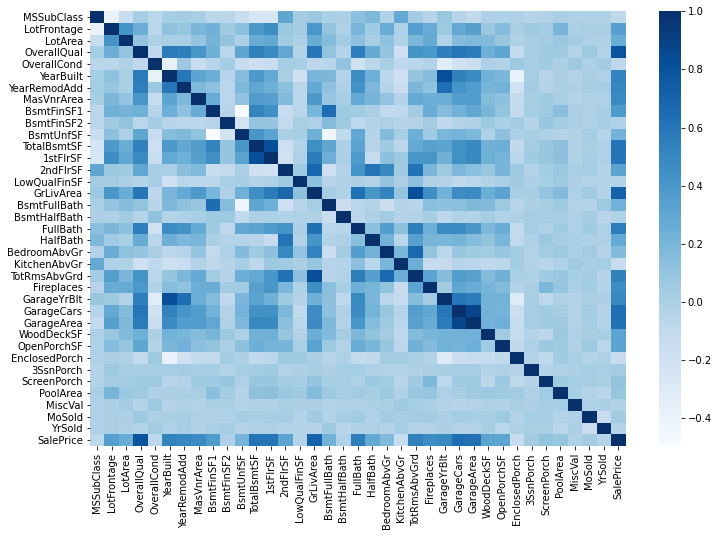

In [11]:
# Explore which numeric columns have high linear correlation
corr_matrix = train_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='Blues')

In [12]:
# Sort the highest linear correlations with target variable
target_var = "SalePrice"
corr_matrix[target_var].apply(lambda x: abs(x)).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

We find that the two features `OverallQual` and `GrLivArea` are the most *linearly* correlated with our target so we can choose to explore them a bit further.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

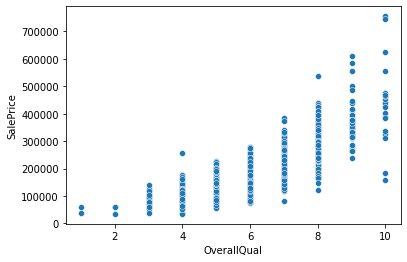

In [13]:
# Explore the second variable (notice the significant Linear Correlation)
sns.scatterplot(x="OverallQual", y="SalePrice", data=train_data)

The following cells explore the distribution of the Target Variable and it can be seen that it is **left-skewed** and has Outliers (as seen from the Percentiles and the critical values). Some ways to deal with such distributions are to:
* Perform a logarithmic transformation on the values (Normalization and Standardization do not alter the skewness, just the scale)
* Explore the Percentiles to come up with some upper/lower thresholds beyond which the values are set to something more common (Boxplots also help here)

We use a Log Transform here: it is simple and the resulting distribution is visually very similar to a Gaussian.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

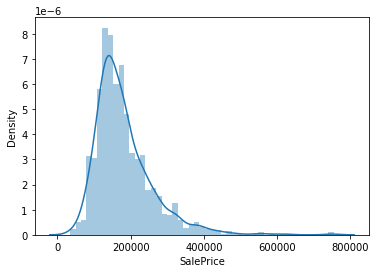

In [14]:
# Explore the Distribution of the Target Variable
sns.distplot(train_data[target_var])

In [15]:
# Where do most values lie under? Explore the Percentiles.
for i in range(95,100):
    print(f"{i}% of the target values lie under: {int(np.percentile(train_data[target_var], i))}")
print(f"Critical Values:\n\tMax:{train_data[target_var].max()}\n\tMin:{train_data[target_var].min()}")

95% of the target values lie under: 326099
96% of the target values lie under: 344151
97% of the target values lie under: 374230
98% of the target values lie under: 394931
99% of the target values lie under: 442567
Critical Values:
	Max:755000
	Min:34900


In [16]:
# We can get rid of Outliers by setting some thresholds
upper_thresh = 38500
# train_data[train_data[target_var] > upper_thresh][target_var] = upper_thresh

Before Log Transform: Skewness 1.880940746034036
After Log Transform: Skewness 0.12122191311528363
Applying Inverse Transformation: Skewness 1.880940746034037
Final Skewness: 0.12122191311528363


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

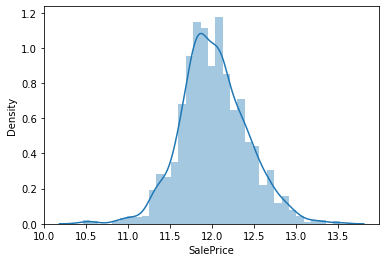

In [17]:
# Log Transform to reduce skewness of the Target Distribution
print(f"Before Log Transform: Skewness {stats.skew(train_data.SalePrice)}")
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])
print(f"After Log Transform: Skewness {stats.skew(train_data.SalePrice)}")
# y = np.expm1(y)
print(f"Applying Inverse Transformation: Skewness {stats.skew(np.expm1(train_data.SalePrice))}") # This is to demonstrate retaining our original targets
print(f"Final Skewness: {stats.skew(train_data.SalePrice)}")
sns.distplot(train_data["SalePrice"])

In [18]:
# Split the data before moving on
X = train_data.drop(target_var, axis=1)
y = train_data[target_var]
X.shape, y.shape

((1460, 79), (1460,))

# Data Cleaning: Dealing with Missing Values

The only two necessary steps for preparing Data for Modeling are:
1. Dealing with Missing values (`nan`)
2. Finding some numerical representation for Categorical/Non-numeric Variables

In Data Cleaning, the focus is on the first step.

<AxesSubplot:>

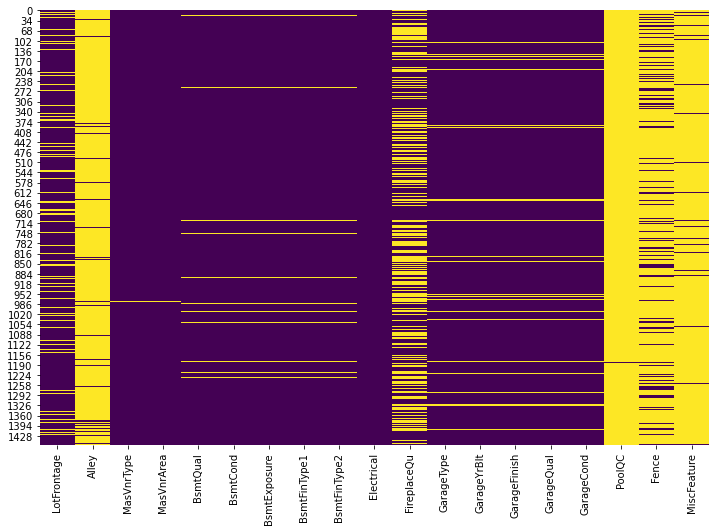

In [19]:
# Get a visual of how many values are missing
missing_count = X.isnull().sum()
missing_count = missing_count[missing_count > 0]
missing_cols = pd.DataFrame(missing_count).index.tolist()
plt.figure(figsize=(12,8))
sns.heatmap(X[missing_cols].isnull(), cmap='viridis', cbar=False)

In [20]:
# Get actual numbers 
missing_count.sort_values(ascending=False) / len(X) * 100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

The variable `PoolQC` has enough values that we could be lazy and drop the entire column, but it may be of benefit to us if we fill the missing values with `0` since the values may just *not exist*. 

We can apply similar thinking to the features related to the Garage and Basements of these houses.

In [21]:
# Which missing value columns are numeric and which are categorical
print(X[missing_cols].dtypes)
X[missing_cols].head(10)

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


In [22]:
# Define a function for Data Cleaning
def handle_missing(df):
    # LotFrontage, MasVnrArea are generic numeric features so we can fill with the median
    cols = ['LotFrontage', 'MasVnrArea']
    for col in cols:
        df[col] = df[col].fillna(df[col].median())
    
    # Some features have missing values because one does not exist for that instance
    none_fill_cols = "Alley BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType GarageFinish GarageQual GarageCond PoolQC Fence MiscFeature".split()
    df[none_fill_cols] = df[none_fill_cols].fillna('NONE')
    
    # Deal with Electrical, MasVnrType and GarageYrBlt
    df['Electrical'] = df['Electrical'].fillna("SBrkr") # This is the average
    df['MasVnrType'] = df['MasVnrType'].fillna(df.MasVnrType.mode()) # The mode makes more sense based on feature description
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0) # This house instance has no garage
    
    # If the testing data has any surprises, we can apply a generic strategy
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())
    for col in cat_cols:
        df[col] = df[col].fillna('NONE')
    
    return df
    
# Apply this to a copy of the DataFrame and check
tmp = X.copy()
tmp = handle_missing(tmp)
tmp.isnull().sum()[tmp.isnull().sum() > 0]

Series([], dtype: int64)

In [23]:
# Apply this to the actual data
X = handle_missing(X)
X.isnull().sum().max()

0

# Feature Engineering and Feature Selection

Some aspects of Feature Engineering include:
* Create Aggregated Features (can result in more robust models, as will be seen later)
* Dealing with heavily Skewed features (either dropping them, transforming them or doing nothing)
* Scaling/Normalizing numeric variables (really only required for **non-Tree-based** algorithms like SVMs, Linear Regression, MLP etc.)
* Encodings for Categorical Variables (the only thing that's necessary to carry out here)

In [24]:
# Some interesting features we can create
def new_features(X):
    X['HasWoodDeck'] = (X['WoodDeckSF'] == 0) * 1

    X['HasOpenPorch'] = (X['OpenPorchSF'] == 0) * 1
    X['HasEnclosedPorch'] = (X['EnclosedPorch'] == 0) * 1
    X['Has3SsnPorch'] = (X['3SsnPorch'] == 0) * 1
    X['HasScreenPorch'] = (X['ScreenPorch'] == 0) * 1

    X['Total_Home_Quality'] = X['OverallQual'] + X['OverallCond']
    X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
    X['TotalSquareFootage'] = (X['BsmtFinSF1'] + X['BsmtFinSF2'] + X['1stFlrSF'] + X['2ndFlrSF'])

    X['HasPool'] = X['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    X['Has2ndFloor'] = X['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    X['HasGarage'] = X['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    X['HasBsmt'] = X['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    X['HasFireplace'] = X['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    
    return X

X  = new_features(X)
len(X.columns)

92

In [25]:
# Find the heavily skewed features
num_columns = X.select_dtypes(include=np.number).columns
skewed_features = X[num_columns].apply(lambda x: abs(stats.skew(x))).sort_values(ascending=False)
high_skewed = skewed_features[skewed_features > 0.5]
high_skewed 

MiscVal               24.451640
PoolArea              14.813135
HasPool               14.337930
LotArea               12.195142
3SsnPorch             10.293752
LowQualFinSF           9.002080
Has3SsnPorch           7.605922
HasBsmt                6.040320
KitchenAbvGr           4.483784
BsmtFinSF2             4.250888
ScreenPorch            4.117977
BsmtHalfBath           4.099186
HasGarage              3.883739
GarageYrBlt            3.865524
HasScreenPorch         3.110067
EnclosedPorch          3.086696
MasVnrArea             2.674865
LotFrontage            2.406671
OpenPorchSF            2.361912
TotalSquareFootage     2.161744
HasEnclosedPorch       2.045816
TotalSF                1.774874
BsmtFinSF1             1.683771
WoodDeckSF             1.539792
TotalBsmtSF            1.522688
MSSubClass             1.406210
1stFlrSF               1.375342
GrLivArea              1.365156
BsmtUnfSF              0.919323
2ndFlrSF               0.812194
OverallCond            0.692355
TotRmsAb

We can set some threshold above which the filtered features will undergo a Logarithmic Transformation but a couple of the features justify their high skewness; e.g. only a few luxury homes have pools so there would naturally be outliers and a pulled distribution.

In [26]:
X.shape, y.shape

((1460, 92), (1460,))

As a final jab at EDA, we shall explore Feature Selection. There are many classes made specifically for this making use of tools like Chi-square tests and whatnot, but a simple and effective approach is to simply **fit a `RandomForest` on the data**.

The forest is made of many Decision Trees so by iterating through each Tree and seeing which splits contribute to better drops in impurity/entropy, the Ensemble can get an idea of which features are *more important* for predicting the target. Since the Ensemble is based on Trees, we only have to 
* Make sure there are no missing values
* Numerically Encode the Categorical Variables (Label vs One Hot doesn't matter for tree-based models since the whole space is explored value-by-value)

In [27]:
# Label Encode a copy of the data
from sklearn import preprocessing
cat_columns = X.select_dtypes(exclude=np.number).columns
fi_data = X.copy()
for feat in cat_columns:
    fi_data[feat] = preprocessing.LabelEncoder().fit_transform(fi_data[feat])
# Use a RandomForest model to look at the Feature Importances 
from sklearn.ensemble import RandomForestRegressor
forest_fi = RandomForestRegressor(n_estimators=100,
                                 min_samples_leaf=5,
                                 min_samples_split=5,
                                 n_jobs=-1).fit(fi_data, y)

In [28]:
# Extract and visualize the importances
importances = forest_fi.feature_importances_
feat_imps = pd.Series(importances, index=fi_data.columns)
feat_imps

MSSubClass      0.001007
MSZoning        0.003392
LotFrontage     0.003805
LotArea         0.008184
Street          0.000000
                  ...   
HasPool         0.000000
Has2ndFloor     0.000035
HasGarage       0.000000
HasBsmt         0.000000
HasFireplace    0.001518
Length: 92, dtype: float64

In [29]:
# Check the top 10 most relevant features to the target variable
feat_imps = feat_imps.sort_values(ascending=False)
feat_imps[:10]

OverallQual           0.463015
TotalSF               0.254837
TotalSquareFootage    0.108515
Total_Home_Quality    0.020936
YearBuilt             0.012121
CentralAir            0.010206
YearRemodAdd          0.009736
GarageCars            0.009530
LotArea               0.008184
GarageArea            0.007905
dtype: float64

<AxesSubplot:title={'center':'Feature Importances after Engineering'}>

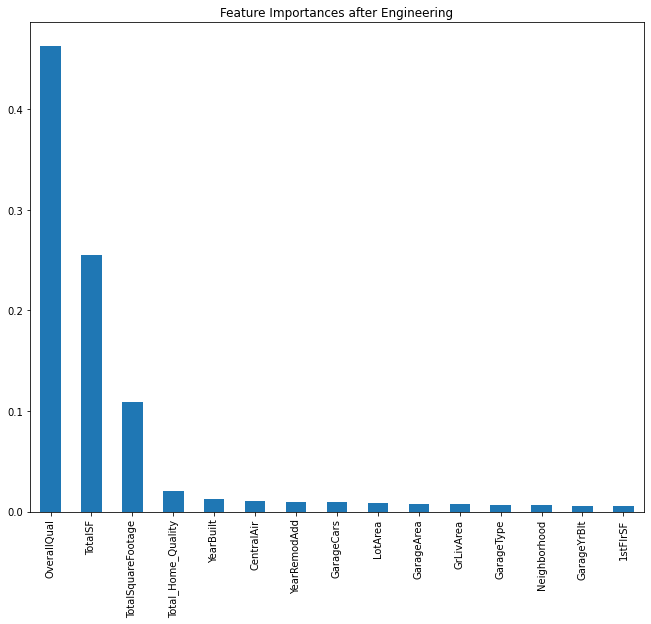

In [30]:
# Visualize the importances
plt.figure(figsize=(11,9))
plt.title("Feature Importances after Engineering")
feat_imps[:15].plot.bar()

Incredible. Three of our aggregated features are among the best that can be used for predicting the Target Variable. 

The `OverallQual` feature still reigns the highest and by a significant margin at that. Other than that we can also see the `YearBuilt` feature among the top predictors which implies that the later a house was built, the price tended to increase a lot more.

Another interesting note is that there are no Basement related features in this top-15 list, but there are a number of *Garage* related features. This could imply that in practice, Garages are more valuable than Basements which makes sense.

# Full Pipeline and Modeling

Now that we have gone through the whole process step-by-step, it would help to functionalize everything (create a Pipeline) for efficiency and code-reproducibility in case we want to run more experiments later.

The following cell applies every transformation/piece of engineering we did thus far.

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test_ids = test_data.Id # TEST IDS STORED HERE!

# Scale and seperate Target Variable
target_var = 'SalePrice'
train_data[target_var] = np.log1p(train_data[target_var]) # TARGET SCALED HERE!
X = train_data.drop(['Id', target_var], axis=1)
y = train_data[target_var]
X_test = test_data.drop('Id', axis=1)

# Data Cleaning
X = handle_missing(X)
X_test = handle_missing(test_data)

# Feature Engineering
X = new_features(X)
X_test = new_features(X_test)

# Pipelines
num_columns = X.select_dtypes(include=np.number).columns
cat_columns = X.select_dtypes(exclude=np.number).columns
pipeline = ColumnTransformer([
    ("one_hot_encoder", preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_columns),
    ("standard_scaler", preprocessing.StandardScaler(), num_columns)
])
X = pipeline.fit_transform(X)
X_test = pipeline.transform(X_test) # Making sure to not fit to the testing set

In [32]:
X.shape, y.shape, X_test.shape

((1460, 317), (1460,), (1459, 317))

Now to finally begin modeling. 

In keeping up with proper Cross Validation schemes, we define a function that returns the RMSE of a model when validated over 5 folds of the data. This is better than using `train_test_split` since that validates the model on only one fold and is vulnerable to randomness influencing the model's performance.

In [33]:
# Import dependencies and models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instantiate a dict (+function) for storing model scores
scores = {}
def get_cv_score(estimator):
    return np.sqrt(-1 * cross_val_score(estimator, X=X, y=y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1))

We start with a Linear Regression model that performs *much much worse* than the other strong learners.

In [34]:
# Start with a simple Linear Model
lin_reg = LinearRegression()
scores['linear_regression'] = get_cv_score(lin_reg)
scores['linear_regression']

array([9.56075737e+08, 7.84322179e+09, 3.23336189e+09, 1.54437977e+09,
       1.68974254e+09])

The cell below takes ~5mins to finish evaluating the models

In [35]:
%%time
import time

# Change the boolean to Cross Validate the Base Models
check_cv = False

if check_cv:
    start = time.time()
    # SVM with Linear Kernel
    linear_svr = SVR(kernel='linear', 
                     C=10, 
                     epsilon=0.01, 
                     gamma=0.0005)
    scores['linear_svr'] = get_cv_score(linear_svr)
    print(f"Finished Linear SVR: {time.time()-start:0.2f}sec")
    start = time.time()
    # SVM with RBF kernel
    svr = SVR(kernel='rbf', 
              C=10, 
              epsilon=0.01, 
              gamma=0.0005)
    scores['svr'] = get_cv_score(svr)
    print(f"Finished Kernel SVR: {time.time()-start:0.2f}sec")
    start = time.time()
    # Random Forest
    rfr = RandomForestRegressor(n_estimators=250, 
                                max_depth=15, 
                                min_samples_leaf=5, 
                                min_samples_split=5, 
                                n_jobs=-1,
                               random_state=42)
    scores['rfr'] = get_cv_score(rfr)
    print(f"Finished Random Forest: {time.time()-start:0.2f}sec")
    start = time.time()
    # Gradient Boosting
    gbr = GradientBoostingRegressor(n_estimators=350, 
                                    learning_rate=0.1, 
                                    loss='huber',
                                   random_state=42)
    scores['gbr'] = get_cv_score(gbr)
    print(f"Finished Gradient Boosting: {time.time()-start:0.2f}sec")
    start = time.time()
    # LGBM
    lgbr = LGBMRegressor(objective='regression',
                        n_estimators=300,
                        learning_rate=0.1,
                        random_state=42)
    scores['lgbr'] = get_cv_score(lgbr)
    print(f"Finished LGBM: {time.time()-start:0.2f}sec")
    start = time.time()
    # AdaBoost with DT Base Estimator
    ada = AdaBoostRegressor(n_estimators=150, 
                            random_state=42)
    scores['ada'] = get_cv_score(ada)
    print(f"Finished AdaBoost: {time.time()-start:0.2f}sec")
    start = time.time()
    # Ending with XGBoost
    xgb = XGBRegressor(n_estimators=300,
                      max_depth=5, 
                      learning_rate=0.1,
                      random_state=42)
    scores['xgb'] = get_cv_score(xgb)
    print(f"Finished XGBoost: {time.time()-start:0.2f}sec")

    # Evaluate models before any serious Hyperparameter tuning
    print(f"AdaBoost: {scores['ada'].mean()}")
    print(f"LGBM: {scores['lgbr'].mean()}")
    print(f"GradientBoosting: {scores['gbr'].mean()}")
    print(f"RandomForest: {scores['rfr'].mean()}")
    print(f"Linear SVR: {scores['linear_svr'].mean()}")
    print(f"Kernel SVR: {scores['svr'].mean()}")
    print(f"XGBoost: {scores['xgb'].mean()}")

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10.5 µs


```
AdaBoost: 34566.742546702626
LGBM: 29158.163160149958
GradientBoosting: 26674.092765014524
RandomForest: 30125.682357409016
Kernel SVR: 43880.25669866572
Linear SVR: 81085.44385548346
XGBoost: 26470.758028378285
```
What we can observe:
* The SVMs performed the worst (though the RBF Kernel performed much better than the Linear Kernel)
* AdaBoost got 5th place
* RandomForests got 4th place
* LGBM got 3rd
* Gradient Boosting got 2nd
* XGBoost performed the best, unsurprisingly, although the training time was nearly 19 times higher

Following cell inspired from Notebook (Hyperparameter values noted):
https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition#Train-a-model

In [36]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Support Vector Regressor
svr = SVR(C= 20, epsilon= 0.008, gamma=0.0003)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=2200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingRegressor(estimators=[
                                ('xgboost',xgboost), 
                                ('lightgbm',lightgbm), 
                                ('svr',svr),  
                                ('gbr',gbr), 
                                ('rf',rf)],
                                final_estimator=xgboost,
                                n_jobs=-1)

We make use of a `StackingRegressor` here which takes a collection of models and aggregates their predictions by having a *meta-learner* treat it as independent variables and the true values as the targets. This is another form of Ensembling.

## Fit the Models

In [37]:
%%time
# Stacking Regressor
stack_gen.fit(X, y)

CPU times: user 13.1 s, sys: 4.38 s, total: 17.4 s
Wall time: 6min 58s


StackingRegressor(estimators=[('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7, gamma=0.6,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max_delta_step=None, max_depth=4,
                                            min_child_weight=0, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=6000, n...
                                               interaction_constraints=None,
                                               learning_rate=0.01,
              

In [38]:
%%time
# Random Forest
rf.fit(X, y)

CPU times: user 55.4 s, sys: 0 ns, total: 55.4 s
Wall time: 55.4 s


RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=2200, oob_score=True,
                      random_state=42)

In [39]:
%%time
# XGBoost
xgboost.fit(X, y)

CPU times: user 1min 45s, sys: 5.58 s, total: 1min 51s
Wall time: 46.2 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=6000, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=42, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [40]:
%%time
# Gradient Boosting
gbr.fit(X, y)

CPU times: user 21.3 s, sys: 0 ns, total: 21.3 s
Wall time: 21.3 s


GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=6000,
                          random_state=42)

In [41]:
%%time
# SVR
svr.fit(X, y)

CPU times: user 1.36 s, sys: 0 ns, total: 1.36 s
Wall time: 1.36 s


SVR(C=20, epsilon=0.008, gamma=0.0003)

In [42]:
%%time
# LGBM
lightgbm.fit(X, y)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
CPU times: user 15 s, sys: 7.68 s, total: 22.7 s
Wall time: 12.1 s


LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              feature_fraction=0.2, feature_fraction_seed=8, learning_rate=0.01,
              max_bin=200, min_sum_hessian_in_leaf=11, n_estimators=7000,
              num_leaves=6, objective='regression', random_state=42,
              verbose=-1)

With all the models trained on the data, we can get their predictions and *blend* them (the final predictions will be a linear combination/weighted sum of the individual models' predictions so that the stronger models aren't totally neglected). The weights should obviously add up to 1.

In [43]:
0.1 + 0.2 + 0.2 + 0.1 + 0.05 + 0.35

1.0

In [44]:
# Blend the predictions
def blended_predictions(X):
    return ((0.1 * svr.predict(X)) + \
            (0.2 * gbr.predict(X)) + \
            (0.2 * xgboost.predict(X)) + \
            (0.1 * lightgbm.predict(X)) + \
            (0.05 * rf.predict(X)) + \
            (0.35 * stack_gen.predict(X)))

# Get the submission file ready, REMEMBERING to invert the log transform we applied earlier
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blended_predictions(X_test)))

submission.to_csv("submission_regression.csv", index=False)

In [45]:
print("FIN")

FIN
